In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from copy import deepcopy

import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))

from classes.agent import Agent
from classes.world import World

from classes.utils import *
from classes.news import News
from classes.agent import AgentState

In [2]:
def cascadesize(world):
    return sum([1 if a.is_active() else 0 for a in world.agents.values()])

def measure_cascadesize(world, starting, max_iter):
    r = np.zeros(max_iter)
    for a in starting.keys():
        a.states[starting[a]] = AgentState.ACTIVE
    r[0] = cascadesize(world)
    for iter in range(1, max_iter):
        x = world.update(verbose=True)
        if x == 0:
            for k in range(iter, max_iter):
                r[k] = r[k-1]
                break
        r[iter] = cascadesize(world)
    return r

In [3]:
def comp_starting_sets(worlds, sets, max_iter = 50):
    ccs = []
    for s, w in zip(sets, worlds):
        ccs.append(measure_cascadesize(w, s, max_iter))
    return ccs

In [4]:
sensation_news = 0.0
decay_parameter_news = 0
n1 = News(0, sensation_news, decay_parameter_news)
news1 = {n1.name: n1}
number_agents = 50
names_agents = [_ for _ in range(number_agents)]
threshold = np.clip(np.random.normal(0.5, 0.1, number_agents), 0.0, 1.0) #mean = 0.5, sigma = 0.1
independence = np.clip(np.random.normal(0.5, 0.1, number_agents), 0.0, 1.0) #mean = 0.5, sigma = 0.1
w1 = construct_world(names_agents, threshold, independence, news1)
w2 = deepcopy(w1)

In [5]:
k = 8
kset = approx_most_influential(w1, k, sample_size=25, verbose=False) #THIS TAKES SOME TIME !!!
s1 = {}
for agent in kset:
    s1[agent] = 0
degree_centrality = []
for _ in range(k):
    best = None
    bdeg = -1
    for a in w2.graph.nodes():
        if w2.agents[a] in degree_centrality:
            continue
        d = w2.graph.out_degree(a)
        if d > bdeg:
            bdeg = d
            best = w2.agents[a]
    degree_centrality.append(best)
s2 = {}
for agent in degree_centrality:
    s2[agent] = 0
print("greedy approximation", [a.name for a in kset])
print("degree centrality   ", [a.name for a in degree_centrality])
print("expected number of influenced: greedy:", get_expected_number_of_influenced_agents(w1, [a.name for a in kset], 100))
print("expected number of influenced: degree:", get_expected_number_of_influenced_agents(w1, [a.name for a in degree_centrality], 100))

greedy approximation [0, 21, 40, 13, 40, 46, 2, 29]
degree centrality    [0, 1, 4, 11, 3, 5, 8, 7]
expected number of influenced: greedy: 24.96
expected number of influenced: degree: 26.16


In [6]:
n = 10
ccs = comp_starting_sets([w1, w2], [s1, s2], n)
for cs in ccs:
    print(cs)

[7. 9. 9. 9. 9. 9. 9. 9. 9. 9.]
[ 8. 17. 18. 18. 18. 18. 18. 18. 18. 18.]


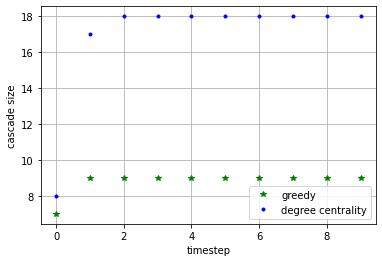

In [7]:
t = np.arange(0, n, 1)
cs1, cs2 = ccs
plt.plot(t, cs1, 'g*', label="greedy")
plt.plot( t, cs2, 'b.', label="degree centrality")
plt.grid()
plt.xlabel("timestep")
plt.ylabel("cascade size")
plt.legend()
plt.show()